# Importing Libraries

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# (1) Data Analysis

In [54]:
dataset = pd.read_csv('House Pricing.csv')

In [55]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [56]:
dataset.shape

(545, 13)

In [57]:
print(dataset.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000  7420         4          2        3      yes        no       no  \
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [58]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [59]:
print(dataset.describe())

              price          area    bedrooms   bathrooms     stories   
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  \
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


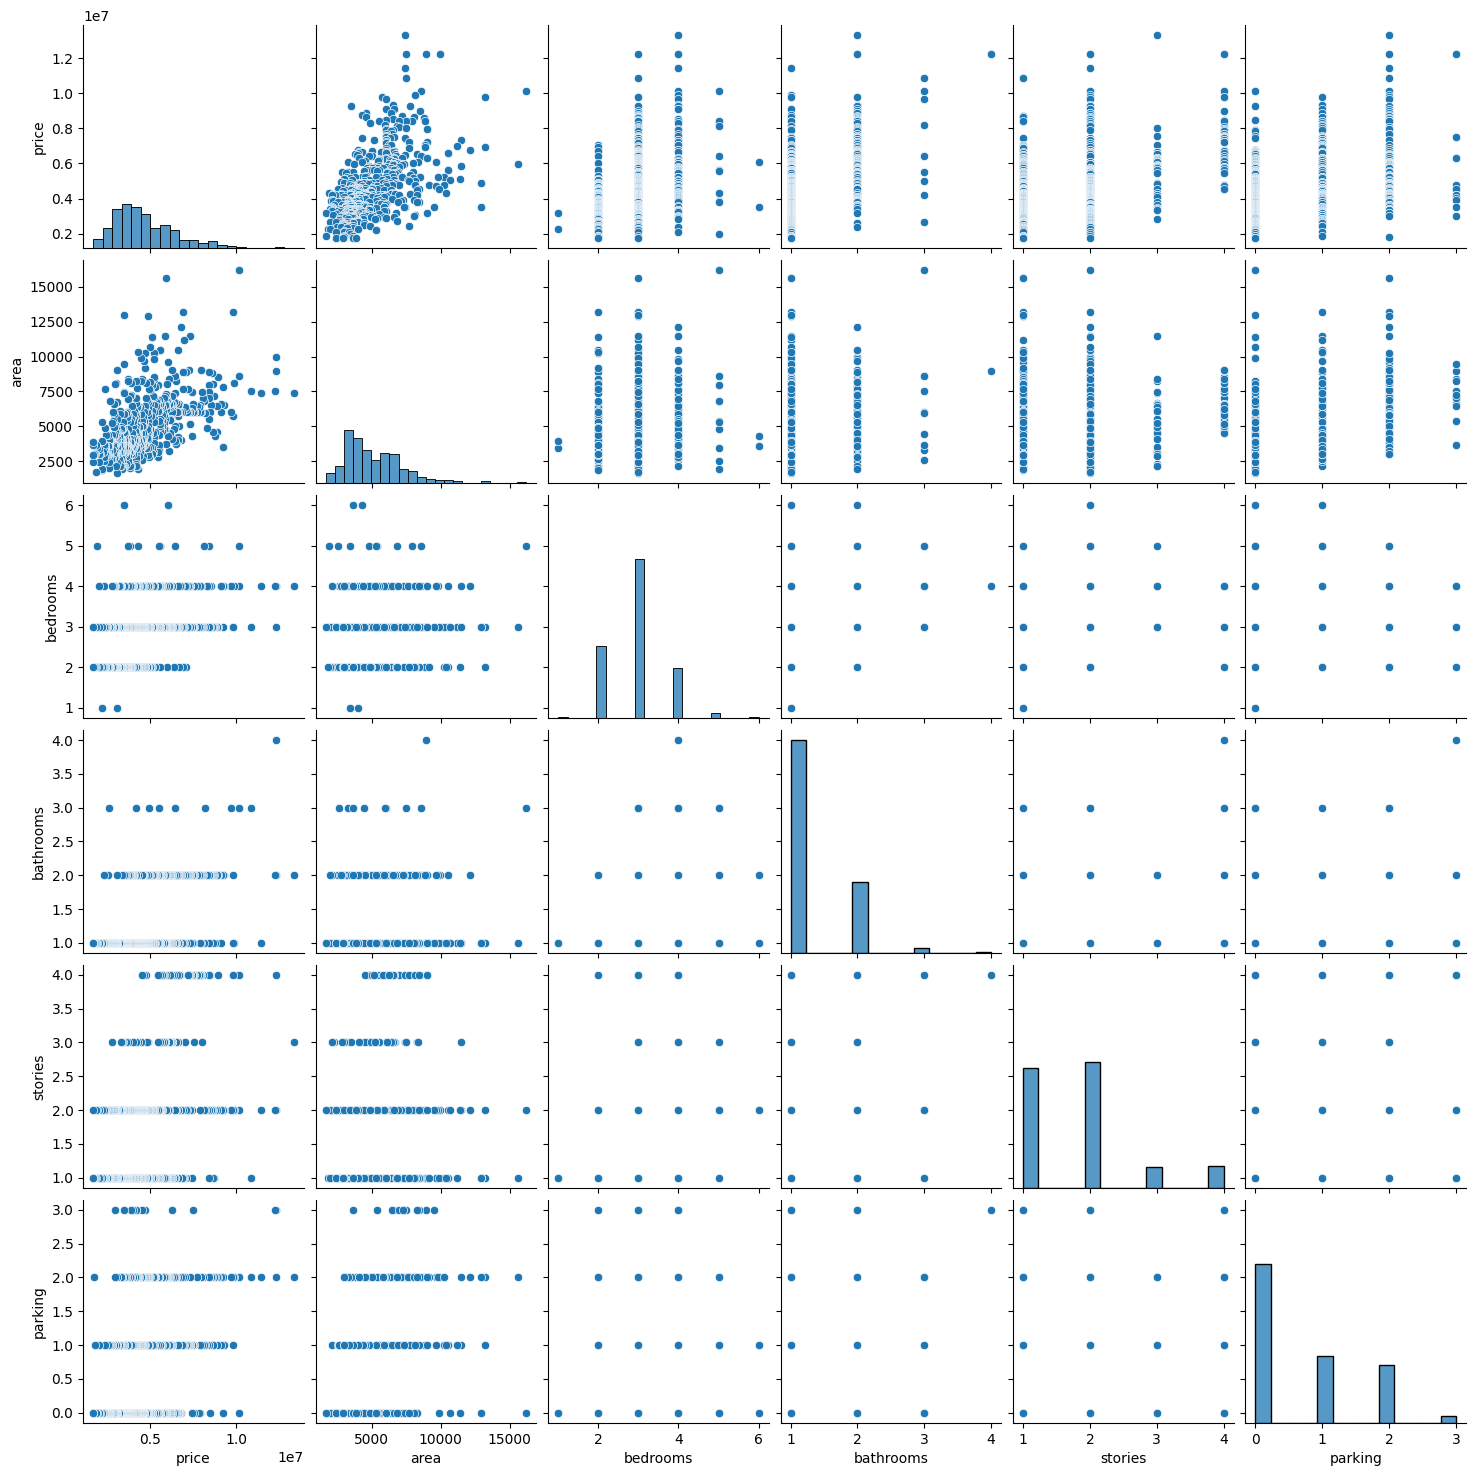

In [60]:
sns.pairplot(dataset)
plt.show()

# (2) Data Preprocessing

In [61]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [62]:
cartList = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']
cartList_encoded = pd.get_dummies(dataset, columns=cartList, drop_first=True)
cartList_encoded = cartList_encoded.astype(int)


In [63]:
cartList_encoded.head(20)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
5,10850000,7500,3,3,1,2,1,0,1,0,1,1,1,0
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,1,0
7,10150000,16200,5,3,2,0,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numOfCol = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler.fit(cartList_encoded [numOfCol])
scaledData = scaler.transform(cartList_encoded[numOfCol])
scaled_encoded = cartList_encoded.copy()
scaled_encoded[numOfCol] = scaledData

In [65]:
scaled_encoded.head(10)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667,1,0,0,0,1,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.000000,1,0,0,0,1,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,0.666667,1,0,1,0,0,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.000000,1,0,1,0,1,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,0.666667,1,1,1,0,1,0,0,0
5,0.787879,0.402062,0.4,0.666667,0.000000,0.666667,1,0,1,0,1,1,1,0
6,0.727273,0.476289,0.6,0.666667,1.000000,0.666667,1,0,0,0,1,1,1,0
7,0.727273,1.000000,0.8,0.666667,0.333333,0.000000,1,0,0,0,0,0,0,1
8,0.703030,0.443299,0.6,0.000000,0.333333,0.666667,1,1,1,0,1,1,0,0
9,0.696970,0.281787,0.4,0.333333,1.000000,0.333333,1,1,0,0,1,1,0,1


In [66]:
from sklearn.model_selection import train_test_split
X = scaled_encoded.drop(['price'], axis = 1)
y = scaled_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (3) Regression Model Development

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

In [69]:
y_train_prediction = LinearReg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_prediction)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_prediction)

In [70]:
print('Training Set: ')
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R-squared Score: ", train_r2)

Training Set: 
Mean Squared Error:  0.007258920848115473
Root Mean Squared Error:  0.08519930074898194
R-squared Score:  0.6859438988560158


In [71]:
y_test_prediction = LinearReg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_prediction)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_prediction)

In [72]:
print("Testing Set: ")
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R-squared Error: ", test_r2)

Testing Set: 
Mean Squared Error:  0.013150568297675587
Root Mean Squared Error:  0.11467592728064416
R-squared Error:  0.6529242642153177


# (4) Model Evaluation

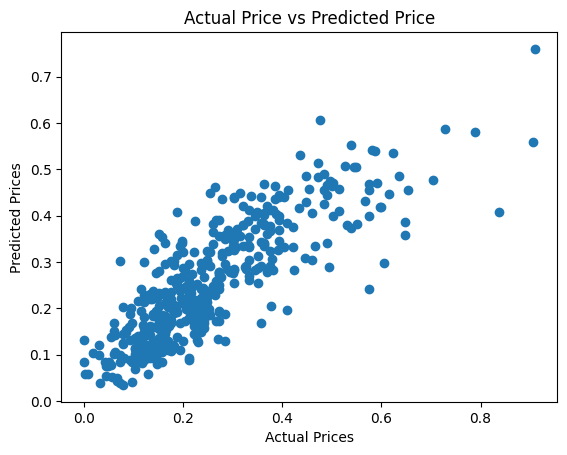

In [73]:
plt.scatter(y_train, y_train_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title('Actual Price vs Predicted Price')
plt.show()

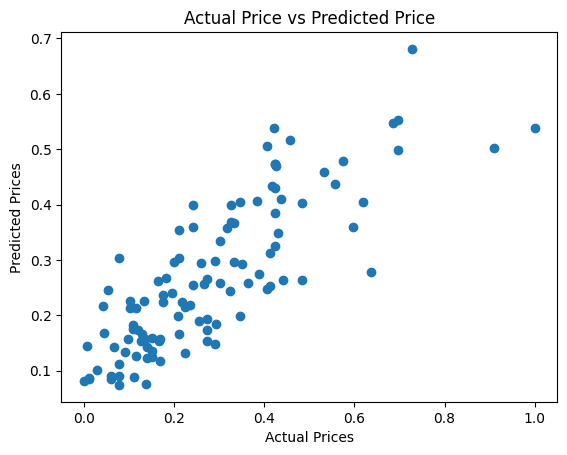

In [74]:
plt.scatter(y_test, y_test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# (5) Hyperparameter tuning

In [75]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [76]:
ridge_reg = Ridge()

In [77]:
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [78]:
grid_search_ridge = GridSearchCV(reg, param_grid=hyperparameters, cv=5)
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [79]:
print('Ridge Regression: ')
print("Best hyperparameters for Ridge regression: ", grid_search_ridge.best_params_)
print("Training Set R-squared: ", grid_search_ridge.best_estimator_.score(X_train, y_train))
print("Testing Set R-squared: ", grid_search_ridge.best_estimator_.score(X_test, y_test))

Ridge Regression: 
Best hyperparameters for Ridge regression:  {'alpha': 1}
Training Set R-squared:  0.6846111531142711
Testing Set R-squared:  0.6523749777945618


In [81]:
lasso_reg = Lasso()
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso_reg, param_grid=hyperparameters, cv=5)
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [82]:
print("Lasso Regression")
print("Best hyperparameters for Lasso regression: ", grid_search_lasso.best_params_)
print("Training Set R-squared: ", grid_search_lasso.best_estimator_.score(X_train, y_train))
print("Testing Set R-squared: ", grid_search_lasso.best_estimator_.score(X_test, y_test))

Lasso Regression
Best hyperparameters for Lasso regression:  {'alpha': 0.001}
Training Set R-squared:  0.6807405078956397
Testing Set R-squared:  0.6382517685051479


In [83]:
print("First Linear Regression Model")
print("Training Set R-squared: ", LinearReg.score(X_train, y_train))
print("Testing Set R-squared: ", LinearReg.score(X_test, y_test))
print("Testing Set MSE: ", mean_squared_error(y_test, y_test_prediction))

First Linear Regression Model
Training Set R-squared:  0.6859438988560158
Testing Set R-squared:  0.6529242642153177
Testing Set MSE:  0.013150568297675587


# (6) Data Presentation (Final)

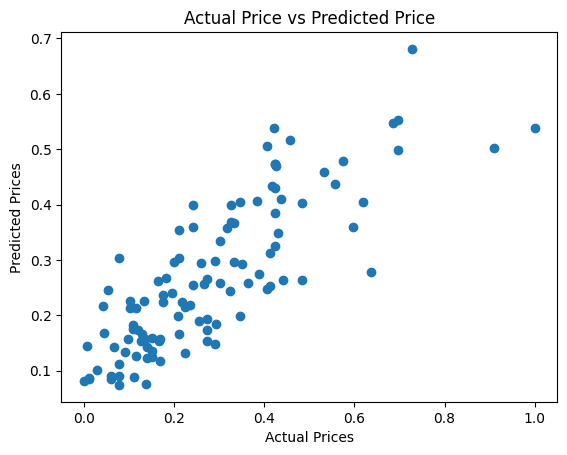

In [84]:
plt.scatter(y_test, y_test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [85]:
y_prediction_ridge = grid_search_ridge.predict(X_test)
y_prediction_lasso = grid_search_lasso.predict(X_test)

In [86]:
print('\nRidge Regression Model')
print('Training Set R-squared:', grid_search_ridge.best_estimator_.score(X_train, y_train))
print('Testing Set R-squared:', grid_search_ridge.best_estimator_.score(X_test, y_test))
print('Testing Set MSE:', mean_squared_error(y_test, y_prediction_ridge))


Ridge Regression Model
Training Set R-squared: 0.6846111531142711
Testing Set R-squared: 0.6523749777945618
Testing Set MSE: 0.013171380552311606


In [87]:
print('\nLasso Regression Model')
print('Training Set R-squared:', grid_search_lasso.best_estimator_.score(X_train, y_train))
print('Testing Set R-squared:', grid_search_lasso.best_estimator_.score(X_test, y_test))
print('Testing Set MSE:', mean_squared_error(y_test, y_prediction_lasso))


Lasso Regression Model
Training Set R-squared: 0.6807405078956397
Testing Set R-squared: 0.6382517685051479
Testing Set MSE: 0.01370650360815676


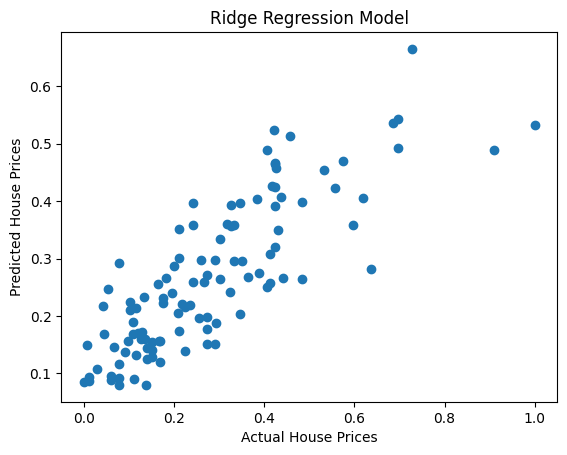

In [88]:
plt.scatter(y_test, y_prediction_ridge)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Ridge Regression Model')
plt.show()

Mean Squared Error: 0.013150568297675587
R-squared: 0.6529242642153177


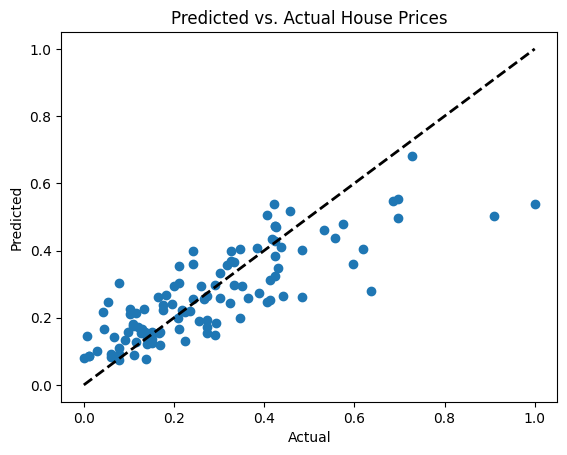

In [89]:
mse = mean_squared_error(y_test, y_test_prediction)
r2 = r2_score(y_test, y_test_prediction)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot predicted vs. actual house prices
plt.scatter(y_test, y_test_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()